# Kaggle Project

## Dataset Review

**URL:** https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset/code

**Task:**

The "Employee" Kaggle dataset contains information about the employees in a company, which provides valuable insights into the workforce.

In this Kaggle dataset analysis project, the Logistic Regression model built and trained to examine the "Employee" Kaggle dataset before was improved and enhanced to achieve higher model performance. A high model performance will create patterns on the leave-taking behavior among employees.

**Datasets**

* Train dataset: 70% of the total 4653 datapoints

* Validation dataset: 15% of the total 4653 datapoints

* Test dataset: 15% of the total 4653 datapoints

**Features(x):**

1) Education: The educational qualifications of employees, including degree, institution, and field of study.
2) Joining Year: The year each employee joined the company, indicating their length of service.
3) City: The location or city where each employee is based or works.
4) Payment Tier: Categorization of employees into different salary tiers.
5) Age: The age of each employee, providing demographic insights.
6) Gender: Gender identity of employees, promoting diversity analysis.
7) Ever Benched: Indicates if an employee has ever been temporarily without assigned work.
8) Experience in Current Domain: The number of years of experience employees have in their current field.

**Target(y):**

9) Leave or Not: the target column, where 1 means the employee will take a leave, and 0 means the employee will not take a leave. 

---

## Model Building

### 1. Data Preprocessing

#### 1.1 Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv("C:\\Users\\Portus\\Downloads\\Employee.csv")
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [3]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [4]:
data.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

#### 1.2 Label Encoding 

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Education', 'City', 'Gender', 'EverBenched']

#Apply label encoding to each categorical column
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  4653 non-null   int32
 1   JoiningYear                4653 non-null   int64
 2   City                       4653 non-null   int32
 3   PaymentTier                4653 non-null   int64
 4   Age                        4653 non-null   int64
 5   Gender                     4653 non-null   int32
 6   EverBenched                4653 non-null   int32
 7   ExperienceInCurrentDomain  4653 non-null   int64
 8   LeaveOrNot                 4653 non-null   int64
dtypes: int32(4), int64(5)
memory usage: 254.6 KB


#### 1.3 Features (x) and Target Variable (y)

In [6]:
x = data.drop('LeaveOrNot',axis = 1)
y = data['LeaveOrNot']

x.shape, y.shape

((4653, 8), (4653,))

##### 1.3.1 Data Normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

#### 1.4 Data Splitting

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.30, random_state=42, shuffle = True)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.50, random_state=42, shuffle = True)

---

### 2. Model Construction

#### 2.1 Logistic Regression

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

In [10]:
x_train = x_train.values if isinstance(x_train, pd.Series) else x_train
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

x_val = x_val.values if isinstance(x_val, pd.Series) else x_val
y_val = y_val.values if isinstance(y_val, pd.Series) else y_val

x_test = x_test.values if isinstance(x_test, pd.Series) else x_test
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test

In [11]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##### 2.1.1 Logistic Regression - Training and Validation

In [12]:
input_size = x_train.shape[1]
hidden_size = 500

model_lr_pytorch = nn.Sequential(nn.Linear(input_size, hidden_size), nn.ReLU(), nn.Linear(hidden_size, 1), nn.Sigmoid())
criterion = nn.BCELoss()
optimizer = optim.Adam(model_lr_pytorch.parameters(), lr=0.001)

In [13]:
num_epochs = 1500
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model_lr_pytorch(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        model_lr_pytorch.eval()  # Set the model to evaluation mode
        val_outputs = model_lr_pytorch(x_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor).item()
        
        val_preds = (val_outputs >= 0.5).float()
        val_acc = (val_preds == y_val_tensor).sum().item() / len(y_val_tensor)
        
        model_lr_pytorch.train()  # Set the model back to training mode
        
        print(f"Epoch [{epoch + 1}/{num_epochs}]")
        print(f"Train Loss: {loss.item():.4f}")
        print(f"Validation Loss: {val_loss:.4f}")
        print(f"Validation Accuracy: {val_acc:.4f}")

Epoch [1/1500]
Train Loss: 0.6622
Validation Loss: 0.6509
Validation Accuracy: 0.6504
Epoch [2/1500]
Train Loss: 0.6524
Validation Loss: 0.6431
Validation Accuracy: 0.6504
Epoch [3/1500]
Train Loss: 0.6447
Validation Loss: 0.6371
Validation Accuracy: 0.6504
Epoch [4/1500]
Train Loss: 0.6387
Validation Loss: 0.6325
Validation Accuracy: 0.6504
Epoch [5/1500]
Train Loss: 0.6343
Validation Loss: 0.6291
Validation Accuracy: 0.6504
Epoch [6/1500]
Train Loss: 0.6311
Validation Loss: 0.6264
Validation Accuracy: 0.6504
Epoch [7/1500]
Train Loss: 0.6286
Validation Loss: 0.6240
Validation Accuracy: 0.6504
Epoch [8/1500]
Train Loss: 0.6266
Validation Loss: 0.6217
Validation Accuracy: 0.6504
Epoch [9/1500]
Train Loss: 0.6247
Validation Loss: 0.6193
Validation Accuracy: 0.6504
Epoch [10/1500]
Train Loss: 0.6228
Validation Loss: 0.6168
Validation Accuracy: 0.6504
Epoch [11/1500]
Train Loss: 0.6207
Validation Loss: 0.6140
Validation Accuracy: 0.6504
Epoch [12/1500]
Train Loss: 0.6185
Validation Loss: 

Epoch [104/1500]
Train Loss: 0.5310
Validation Loss: 0.5037
Validation Accuracy: 0.7593
Epoch [105/1500]
Train Loss: 0.5303
Validation Loss: 0.5028
Validation Accuracy: 0.7593
Epoch [106/1500]
Train Loss: 0.5296
Validation Loss: 0.5020
Validation Accuracy: 0.7607
Epoch [107/1500]
Train Loss: 0.5289
Validation Loss: 0.5012
Validation Accuracy: 0.7607
Epoch [108/1500]
Train Loss: 0.5282
Validation Loss: 0.5004
Validation Accuracy: 0.7650
Epoch [109/1500]
Train Loss: 0.5275
Validation Loss: 0.4996
Validation Accuracy: 0.7650
Epoch [110/1500]
Train Loss: 0.5268
Validation Loss: 0.4988
Validation Accuracy: 0.7679
Epoch [111/1500]
Train Loss: 0.5261
Validation Loss: 0.4980
Validation Accuracy: 0.7693
Epoch [112/1500]
Train Loss: 0.5254
Validation Loss: 0.4971
Validation Accuracy: 0.7679
Epoch [113/1500]
Train Loss: 0.5247
Validation Loss: 0.4963
Validation Accuracy: 0.7693
Epoch [114/1500]
Train Loss: 0.5240
Validation Loss: 0.4955
Validation Accuracy: 0.7751
Epoch [115/1500]
Train Loss: 0.5

Epoch [203/1500]
Train Loss: 0.4733
Validation Loss: 0.4418
Validation Accuracy: 0.8181
Epoch [204/1500]
Train Loss: 0.4728
Validation Loss: 0.4413
Validation Accuracy: 0.8195
Epoch [205/1500]
Train Loss: 0.4724
Validation Loss: 0.4409
Validation Accuracy: 0.8195
Epoch [206/1500]
Train Loss: 0.4719
Validation Loss: 0.4405
Validation Accuracy: 0.8195
Epoch [207/1500]
Train Loss: 0.4715
Validation Loss: 0.4401
Validation Accuracy: 0.8195
Epoch [208/1500]
Train Loss: 0.4710
Validation Loss: 0.4396
Validation Accuracy: 0.8181
Epoch [209/1500]
Train Loss: 0.4706
Validation Loss: 0.4392
Validation Accuracy: 0.8195
Epoch [210/1500]
Train Loss: 0.4701
Validation Loss: 0.4387
Validation Accuracy: 0.8195
Epoch [211/1500]
Train Loss: 0.4697
Validation Loss: 0.4382
Validation Accuracy: 0.8209
Epoch [212/1500]
Train Loss: 0.4693
Validation Loss: 0.4378
Validation Accuracy: 0.8209
Epoch [213/1500]
Train Loss: 0.4688
Validation Loss: 0.4373
Validation Accuracy: 0.8209
Epoch [214/1500]
Train Loss: 0.4

Epoch [301/1500]
Train Loss: 0.4348
Validation Loss: 0.4050
Validation Accuracy: 0.8410
Epoch [302/1500]
Train Loss: 0.4345
Validation Loss: 0.4047
Validation Accuracy: 0.8410
Epoch [303/1500]
Train Loss: 0.4341
Validation Loss: 0.4044
Validation Accuracy: 0.8395
Epoch [304/1500]
Train Loss: 0.4338
Validation Loss: 0.4040
Validation Accuracy: 0.8395
Epoch [305/1500]
Train Loss: 0.4335
Validation Loss: 0.4037
Validation Accuracy: 0.8395
Epoch [306/1500]
Train Loss: 0.4332
Validation Loss: 0.4034
Validation Accuracy: 0.8395
Epoch [307/1500]
Train Loss: 0.4328
Validation Loss: 0.4031
Validation Accuracy: 0.8395
Epoch [308/1500]
Train Loss: 0.4325
Validation Loss: 0.4028
Validation Accuracy: 0.8410
Epoch [309/1500]
Train Loss: 0.4322
Validation Loss: 0.4024
Validation Accuracy: 0.8410
Epoch [310/1500]
Train Loss: 0.4319
Validation Loss: 0.4021
Validation Accuracy: 0.8410
Epoch [311/1500]
Train Loss: 0.4315
Validation Loss: 0.4018
Validation Accuracy: 0.8424
Epoch [312/1500]
Train Loss: 0.4

Epoch [401/1500]
Train Loss: 0.4056
Validation Loss: 0.3771
Validation Accuracy: 0.8668
Epoch [402/1500]
Train Loss: 0.4054
Validation Loss: 0.3769
Validation Accuracy: 0.8668
Epoch [403/1500]
Train Loss: 0.4051
Validation Loss: 0.3766
Validation Accuracy: 0.8668
Epoch [404/1500]
Train Loss: 0.4049
Validation Loss: 0.3764
Validation Accuracy: 0.8668
Epoch [405/1500]
Train Loss: 0.4046
Validation Loss: 0.3761
Validation Accuracy: 0.8668
Epoch [406/1500]
Train Loss: 0.4044
Validation Loss: 0.3759
Validation Accuracy: 0.8668
Epoch [407/1500]
Train Loss: 0.4041
Validation Loss: 0.3757
Validation Accuracy: 0.8668
Epoch [408/1500]
Train Loss: 0.4039
Validation Loss: 0.3755
Validation Accuracy: 0.8668
Epoch [409/1500]
Train Loss: 0.4037
Validation Loss: 0.3752
Validation Accuracy: 0.8668
Epoch [410/1500]
Train Loss: 0.4034
Validation Loss: 0.3750
Validation Accuracy: 0.8682
Epoch [411/1500]
Train Loss: 0.4032
Validation Loss: 0.3748
Validation Accuracy: 0.8682
Epoch [412/1500]
Train Loss: 0.4

Epoch [500/1500]
Train Loss: 0.3842
Validation Loss: 0.3570
Validation Accuracy: 0.8739
Epoch [501/1500]
Train Loss: 0.3840
Validation Loss: 0.3569
Validation Accuracy: 0.8739
Epoch [502/1500]
Train Loss: 0.3838
Validation Loss: 0.3567
Validation Accuracy: 0.8739
Epoch [503/1500]
Train Loss: 0.3836
Validation Loss: 0.3565
Validation Accuracy: 0.8739
Epoch [504/1500]
Train Loss: 0.3834
Validation Loss: 0.3564
Validation Accuracy: 0.8739
Epoch [505/1500]
Train Loss: 0.3832
Validation Loss: 0.3562
Validation Accuracy: 0.8739
Epoch [506/1500]
Train Loss: 0.3830
Validation Loss: 0.3560
Validation Accuracy: 0.8739
Epoch [507/1500]
Train Loss: 0.3829
Validation Loss: 0.3559
Validation Accuracy: 0.8739
Epoch [508/1500]
Train Loss: 0.3827
Validation Loss: 0.3557
Validation Accuracy: 0.8739
Epoch [509/1500]
Train Loss: 0.3825
Validation Loss: 0.3555
Validation Accuracy: 0.8739
Epoch [510/1500]
Train Loss: 0.3823
Validation Loss: 0.3554
Validation Accuracy: 0.8739
Epoch [511/1500]
Train Loss: 0.3

Epoch [601/1500]
Train Loss: 0.3679
Validation Loss: 0.3447
Validation Accuracy: 0.8782
Epoch [602/1500]
Train Loss: 0.3678
Validation Loss: 0.3446
Validation Accuracy: 0.8782
Epoch [603/1500]
Train Loss: 0.3676
Validation Loss: 0.3445
Validation Accuracy: 0.8782
Epoch [604/1500]
Train Loss: 0.3675
Validation Loss: 0.3444
Validation Accuracy: 0.8782
Epoch [605/1500]
Train Loss: 0.3674
Validation Loss: 0.3443
Validation Accuracy: 0.8782
Epoch [606/1500]
Train Loss: 0.3672
Validation Loss: 0.3442
Validation Accuracy: 0.8797
Epoch [607/1500]
Train Loss: 0.3671
Validation Loss: 0.3440
Validation Accuracy: 0.8797
Epoch [608/1500]
Train Loss: 0.3670
Validation Loss: 0.3440
Validation Accuracy: 0.8797
Epoch [609/1500]
Train Loss: 0.3668
Validation Loss: 0.3439
Validation Accuracy: 0.8797
Epoch [610/1500]
Train Loss: 0.3667
Validation Loss: 0.3438
Validation Accuracy: 0.8797
Epoch [611/1500]
Train Loss: 0.3666
Validation Loss: 0.3437
Validation Accuracy: 0.8797
Epoch [612/1500]
Train Loss: 0.3

Epoch [702/1500]
Train Loss: 0.3559
Validation Loss: 0.3368
Validation Accuracy: 0.8811
Epoch [703/1500]
Train Loss: 0.3558
Validation Loss: 0.3367
Validation Accuracy: 0.8811
Epoch [704/1500]
Train Loss: 0.3557
Validation Loss: 0.3367
Validation Accuracy: 0.8811
Epoch [705/1500]
Train Loss: 0.3556
Validation Loss: 0.3366
Validation Accuracy: 0.8811
Epoch [706/1500]
Train Loss: 0.3555
Validation Loss: 0.3365
Validation Accuracy: 0.8811
Epoch [707/1500]
Train Loss: 0.3554
Validation Loss: 0.3365
Validation Accuracy: 0.8811
Epoch [708/1500]
Train Loss: 0.3553
Validation Loss: 0.3364
Validation Accuracy: 0.8811
Epoch [709/1500]
Train Loss: 0.3552
Validation Loss: 0.3363
Validation Accuracy: 0.8811
Epoch [710/1500]
Train Loss: 0.3551
Validation Loss: 0.3363
Validation Accuracy: 0.8811
Epoch [711/1500]
Train Loss: 0.3550
Validation Loss: 0.3362
Validation Accuracy: 0.8811
Epoch [712/1500]
Train Loss: 0.3549
Validation Loss: 0.3361
Validation Accuracy: 0.8811
Epoch [713/1500]
Train Loss: 0.3

Epoch [799/1500]
Train Loss: 0.3466
Validation Loss: 0.3322
Validation Accuracy: 0.8854
Epoch [800/1500]
Train Loss: 0.3466
Validation Loss: 0.3322
Validation Accuracy: 0.8854
Epoch [801/1500]
Train Loss: 0.3465
Validation Loss: 0.3322
Validation Accuracy: 0.8854
Epoch [802/1500]
Train Loss: 0.3464
Validation Loss: 0.3323
Validation Accuracy: 0.8854
Epoch [803/1500]
Train Loss: 0.3463
Validation Loss: 0.3322
Validation Accuracy: 0.8825
Epoch [804/1500]
Train Loss: 0.3462
Validation Loss: 0.3322
Validation Accuracy: 0.8854
Epoch [805/1500]
Train Loss: 0.3461
Validation Loss: 0.3321
Validation Accuracy: 0.8825
Epoch [806/1500]
Train Loss: 0.3460
Validation Loss: 0.3322
Validation Accuracy: 0.8854
Epoch [807/1500]
Train Loss: 0.3459
Validation Loss: 0.3321
Validation Accuracy: 0.8825
Epoch [808/1500]
Train Loss: 0.3459
Validation Loss: 0.3322
Validation Accuracy: 0.8825
Epoch [809/1500]
Train Loss: 0.3458
Validation Loss: 0.3321
Validation Accuracy: 0.8825
Epoch [810/1500]
Train Loss: 0.3

Epoch [900/1500]
Train Loss: 0.3387
Validation Loss: 0.3294
Validation Accuracy: 0.8840
Epoch [901/1500]
Train Loss: 0.3386
Validation Loss: 0.3296
Validation Accuracy: 0.8840
Epoch [902/1500]
Train Loss: 0.3385
Validation Loss: 0.3293
Validation Accuracy: 0.8840
Epoch [903/1500]
Train Loss: 0.3384
Validation Loss: 0.3294
Validation Accuracy: 0.8840
Epoch [904/1500]
Train Loss: 0.3384
Validation Loss: 0.3293
Validation Accuracy: 0.8840
Epoch [905/1500]
Train Loss: 0.3383
Validation Loss: 0.3294
Validation Accuracy: 0.8840
Epoch [906/1500]
Train Loss: 0.3382
Validation Loss: 0.3293
Validation Accuracy: 0.8840
Epoch [907/1500]
Train Loss: 0.3381
Validation Loss: 0.3293
Validation Accuracy: 0.8840
Epoch [908/1500]
Train Loss: 0.3381
Validation Loss: 0.3293
Validation Accuracy: 0.8840
Epoch [909/1500]
Train Loss: 0.3380
Validation Loss: 0.3292
Validation Accuracy: 0.8840
Epoch [910/1500]
Train Loss: 0.3379
Validation Loss: 0.3292
Validation Accuracy: 0.8840
Epoch [911/1500]
Train Loss: 0.3

Epoch [1000/1500]
Train Loss: 0.3319
Validation Loss: 0.3282
Validation Accuracy: 0.8797
Epoch [1001/1500]
Train Loss: 0.3319
Validation Loss: 0.3283
Validation Accuracy: 0.8797
Epoch [1002/1500]
Train Loss: 0.3318
Validation Loss: 0.3283
Validation Accuracy: 0.8797
Epoch [1003/1500]
Train Loss: 0.3317
Validation Loss: 0.3283
Validation Accuracy: 0.8797
Epoch [1004/1500]
Train Loss: 0.3317
Validation Loss: 0.3283
Validation Accuracy: 0.8797
Epoch [1005/1500]
Train Loss: 0.3316
Validation Loss: 0.3283
Validation Accuracy: 0.8797
Epoch [1006/1500]
Train Loss: 0.3315
Validation Loss: 0.3283
Validation Accuracy: 0.8797
Epoch [1007/1500]
Train Loss: 0.3315
Validation Loss: 0.3282
Validation Accuracy: 0.8797
Epoch [1008/1500]
Train Loss: 0.3314
Validation Loss: 0.3283
Validation Accuracy: 0.8797
Epoch [1009/1500]
Train Loss: 0.3314
Validation Loss: 0.3282
Validation Accuracy: 0.8797
Epoch [1010/1500]
Train Loss: 0.3313
Validation Loss: 0.3284
Validation Accuracy: 0.8825
Epoch [1011/1500]
Tra

Epoch [1094/1500]
Train Loss: 0.3264
Validation Loss: 0.3283
Validation Accuracy: 0.8840
Epoch [1095/1500]
Train Loss: 0.3263
Validation Loss: 0.3281
Validation Accuracy: 0.8854
Epoch [1096/1500]
Train Loss: 0.3263
Validation Loss: 0.3284
Validation Accuracy: 0.8840
Epoch [1097/1500]
Train Loss: 0.3262
Validation Loss: 0.3281
Validation Accuracy: 0.8854
Epoch [1098/1500]
Train Loss: 0.3262
Validation Loss: 0.3283
Validation Accuracy: 0.8840
Epoch [1099/1500]
Train Loss: 0.3261
Validation Loss: 0.3281
Validation Accuracy: 0.8854
Epoch [1100/1500]
Train Loss: 0.3261
Validation Loss: 0.3284
Validation Accuracy: 0.8840
Epoch [1101/1500]
Train Loss: 0.3260
Validation Loss: 0.3282
Validation Accuracy: 0.8854
Epoch [1102/1500]
Train Loss: 0.3259
Validation Loss: 0.3283
Validation Accuracy: 0.8854
Epoch [1103/1500]
Train Loss: 0.3259
Validation Loss: 0.3283
Validation Accuracy: 0.8854
Epoch [1104/1500]
Train Loss: 0.3258
Validation Loss: 0.3283
Validation Accuracy: 0.8854
Epoch [1105/1500]
Tra

Epoch [1192/1500]
Train Loss: 0.3212
Validation Loss: 0.3287
Validation Accuracy: 0.8840
Epoch [1193/1500]
Train Loss: 0.3211
Validation Loss: 0.3285
Validation Accuracy: 0.8854
Epoch [1194/1500]
Train Loss: 0.3211
Validation Loss: 0.3287
Validation Accuracy: 0.8840
Epoch [1195/1500]
Train Loss: 0.3210
Validation Loss: 0.3286
Validation Accuracy: 0.8854
Epoch [1196/1500]
Train Loss: 0.3210
Validation Loss: 0.3287
Validation Accuracy: 0.8854
Epoch [1197/1500]
Train Loss: 0.3209
Validation Loss: 0.3287
Validation Accuracy: 0.8854
Epoch [1198/1500]
Train Loss: 0.3209
Validation Loss: 0.3286
Validation Accuracy: 0.8854
Epoch [1199/1500]
Train Loss: 0.3208
Validation Loss: 0.3287
Validation Accuracy: 0.8854
Epoch [1200/1500]
Train Loss: 0.3208
Validation Loss: 0.3287
Validation Accuracy: 0.8854
Epoch [1201/1500]
Train Loss: 0.3207
Validation Loss: 0.3289
Validation Accuracy: 0.8854
Epoch [1202/1500]
Train Loss: 0.3207
Validation Loss: 0.3287
Validation Accuracy: 0.8854
Epoch [1203/1500]
Tra

Epoch [1290/1500]
Train Loss: 0.3164
Validation Loss: 0.3289
Validation Accuracy: 0.8825
Epoch [1291/1500]
Train Loss: 0.3164
Validation Loss: 0.3289
Validation Accuracy: 0.8825
Epoch [1292/1500]
Train Loss: 0.3163
Validation Loss: 0.3289
Validation Accuracy: 0.8825
Epoch [1293/1500]
Train Loss: 0.3163
Validation Loss: 0.3288
Validation Accuracy: 0.8840
Epoch [1294/1500]
Train Loss: 0.3162
Validation Loss: 0.3289
Validation Accuracy: 0.8825
Epoch [1295/1500]
Train Loss: 0.3162
Validation Loss: 0.3288
Validation Accuracy: 0.8825
Epoch [1296/1500]
Train Loss: 0.3161
Validation Loss: 0.3289
Validation Accuracy: 0.8825
Epoch [1297/1500]
Train Loss: 0.3161
Validation Loss: 0.3288
Validation Accuracy: 0.8825
Epoch [1298/1500]
Train Loss: 0.3160
Validation Loss: 0.3288
Validation Accuracy: 0.8825
Epoch [1299/1500]
Train Loss: 0.3160
Validation Loss: 0.3288
Validation Accuracy: 0.8825
Epoch [1300/1500]
Train Loss: 0.3159
Validation Loss: 0.3288
Validation Accuracy: 0.8825
Epoch [1301/1500]
Tra

Epoch [1390/1500]
Train Loss: 0.3118
Validation Loss: 0.3292
Validation Accuracy: 0.8854
Epoch [1391/1500]
Train Loss: 0.3118
Validation Loss: 0.3290
Validation Accuracy: 0.8854
Epoch [1392/1500]
Train Loss: 0.3117
Validation Loss: 0.3291
Validation Accuracy: 0.8854
Epoch [1393/1500]
Train Loss: 0.3117
Validation Loss: 0.3291
Validation Accuracy: 0.8854
Epoch [1394/1500]
Train Loss: 0.3116
Validation Loss: 0.3291
Validation Accuracy: 0.8854
Epoch [1395/1500]
Train Loss: 0.3116
Validation Loss: 0.3291
Validation Accuracy: 0.8840
Epoch [1396/1500]
Train Loss: 0.3115
Validation Loss: 0.3290
Validation Accuracy: 0.8854
Epoch [1397/1500]
Train Loss: 0.3115
Validation Loss: 0.3292
Validation Accuracy: 0.8840
Epoch [1398/1500]
Train Loss: 0.3114
Validation Loss: 0.3289
Validation Accuracy: 0.8840
Epoch [1399/1500]
Train Loss: 0.3114
Validation Loss: 0.3292
Validation Accuracy: 0.8868
Epoch [1400/1500]
Train Loss: 0.3114
Validation Loss: 0.3289
Validation Accuracy: 0.8840
Epoch [1401/1500]
Tra

Epoch [1490/1500]
Train Loss: 0.3077
Validation Loss: 0.3298
Validation Accuracy: 0.8854
Epoch [1491/1500]
Train Loss: 0.3076
Validation Loss: 0.3297
Validation Accuracy: 0.8883
Epoch [1492/1500]
Train Loss: 0.3076
Validation Loss: 0.3298
Validation Accuracy: 0.8840
Epoch [1493/1500]
Train Loss: 0.3075
Validation Loss: 0.3297
Validation Accuracy: 0.8868
Epoch [1494/1500]
Train Loss: 0.3075
Validation Loss: 0.3298
Validation Accuracy: 0.8868
Epoch [1495/1500]
Train Loss: 0.3075
Validation Loss: 0.3297
Validation Accuracy: 0.8868
Epoch [1496/1500]
Train Loss: 0.3074
Validation Loss: 0.3299
Validation Accuracy: 0.8854
Epoch [1497/1500]
Train Loss: 0.3074
Validation Loss: 0.3297
Validation Accuracy: 0.8868
Epoch [1498/1500]
Train Loss: 0.3073
Validation Loss: 0.3299
Validation Accuracy: 0.8854
Epoch [1499/1500]
Train Loss: 0.3073
Validation Loss: 0.3297
Validation Accuracy: 0.8868
Epoch [1500/1500]
Train Loss: 0.3073
Validation Loss: 0.3299
Validation Accuracy: 0.8854


#### 2.2 Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [15]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20], 'splitter': ['best', 'random']}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
Best Estimator: DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')


##### 2.2.1 Decision Tree Classifier - Training, Validation, and Testing

In [16]:
model_dt = DecisionTreeClassifier(criterion='gini',splitter='random', max_depth = 10, random_state = 0)
models = [model_dt]

In [17]:
for model in models:
    model.fit(x_train, y_train)
    pre = model.predict(x_train)
    
    acc = accuracy_score(pre, y_train)
    
    print(f"{model} accuracy   \t: {acc}")

DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random') accuracy   	: 0.881793061099171


In [18]:
for model in models:
    pre = model.predict(x_val)
    
    acc = accuracy_score(pre, y_val)
    
    print(f"{model} accuracy   \t: {acc}")

DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random') accuracy   	: 0.8667621776504298


In [19]:
pre = model.predict(x_test)
acc = accuracy_score(y_test, pre)
print("Test Accuracy:", acc)

Test Accuracy: 0.83810888252149


---

## Performance

### Logistic Regression

In [20]:
with torch.no_grad():
    model_lr_pytorch.eval()  # Set the model to evaluation mode
    test_outputs = model_lr_pytorch(x_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor).item()
    
    test_preds = (test_outputs >= 0.5).float()
    test_acc = (test_preds == y_test_tensor).sum().item() / len(y_test_tensor)
    
    print(f"Test Loss: {test_loss:.5f}")
    print(f"Test Accuracy: {test_acc:.5f}")

Test Loss: 0.38666
Test Accuracy: 0.84241


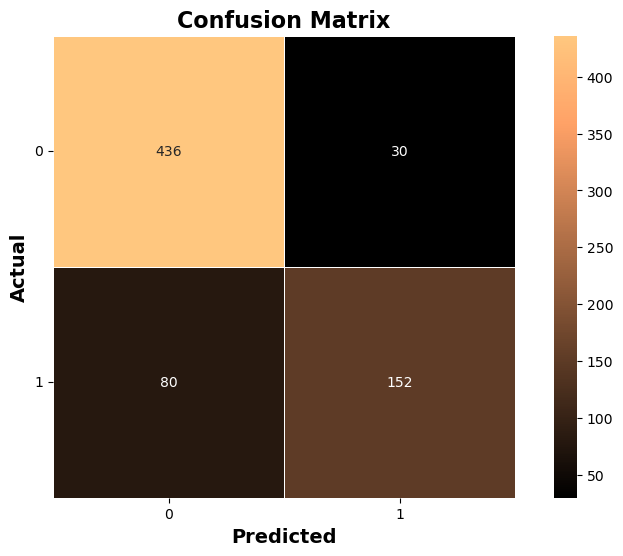

In [21]:
from sklearn.metrics import confusion_matrix

pytorch_predictions = model_lr_pytorch(x_test_tensor)
pytorch_predictions = (pytorch_predictions > 0.5).float().detach().numpy().flatten()

y_test_numpy = y_test_tensor.numpy().flatten()
cm = confusion_matrix(y_test_numpy, pytorch_predictions)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='copper', linewidths=0.4, square=True, cbar=True, xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Predicted", fontsize=14, fontweight="bold")
plt.ylabel("Actual", fontsize=14, fontweight="bold")
plt.title("Confusion Matrix", fontsize=16, fontweight="bold")
plt.yticks(rotation=360)
plt.show()

The results explain

that hyperparameter tuning greatly improved the performance of the Logistic Regression model. The before Logistic Regression model that was built and trained through scikit-learn achieved a accuracy of 71%, meanwhile the improved and enhanced Logistic Regression model that was  built and trained through pytorch achieved a test accuracy of 85%. The model performance improved by 20% through hyperparameter tuning in pytorch. 

Additionally, the original dataset split was 80% training&validation and 20% testing. The enhanced model made use of 70% training, 15% validation, and 15% testing, which also aided to the improvement of the model's performance. 

The improved Logistic Regression model showed the same performance with the Decision Tree Classifier model, which was determined the best model from the Kaggle dataset analysis project before. Based on the generated confusion matrix of the 20% testing set, the total number of misclassifications by the Logistic Regression model was 110 datapoints - 30 false positives and 80 false negatives. On the other hand, the total number of correct classifications was 588 datapoints including 436 true positives and 152 true negatives. 